# **Data Loading and Exploration**

#**Concrete strength testing process** rubble-bursts-and-splashes-on-white-background_1106493-292605.avif

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Concrete_Data_Yeh.csv to Concrete_Data_Yeh.csv


# **Data Preprocessing and Normalization**

In [7]:
import pandas as pd

# Чтение CSV-файла
data = pd.read_csv('Concrete_Data_Yeh.csv', encoding='ISO-8859-1')


# Вывод первых строк таблицы
print(data.head())


  cement;slag;flyash;water;superplasticizer;coarseaggregate;fineaggregate;age;csMPa
0                  540;0;0;162;2.5;1040;676;28;79.99                               
1                  540;0;0;162;2.5;1055;676;28;61.89                               
2              332.5;142.5;0;228;0;932;594;270;40.27                               
3              332.5;142.5;0;228;0;932;594;365;41.05                               
4           198.6;132.4;0;192;0;978.4;825.5;360;44.3                               


In [8]:
# Проверка на пропуски
print(data.isnull().sum())

# Описательная статистика
print(data.describe())


cement;slag;flyash;water;superplasticizer;coarseaggregate;fineaggregate;age;csMPa    0
dtype: int64
       cement;slag;flyash;water;superplasticizer;coarseaggregate;fineaggregate;age;csMPa
count                                                1030                               
unique                                               1005                               
top             362.6;189;0;164.9;11.6;944.7;755.8;3;35.3                               
freq                                                    4                               


# **Train-Test Split**

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Чтение CSV-файла с указанием правильного разделителя и кодировки
data = pd.read_csv('Concrete_Data_Yeh.csv', encoding='cp1251', sep=';')

# Приведение всех столбцов к числовому типу (нечисловые значения будут заменены на NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Обработка пропущенных данных (заполнение средними значениями)
data = data.fillna(data.mean())

# Нормализация данных с использованием MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print(scaled_data)


[[1.         0.         0.         ... 0.20572002 0.07417582 0.96748474]
 [1.         0.         0.         ... 0.20572002 0.07417582 0.74199576]
 [0.52625571 0.39649416 0.         ... 0.         0.73901099 0.47265479]
 ...
 [0.10616438 0.38786867 0.54272864 ... 0.46663322 0.07417582 0.26622649]
 [0.1303653  0.51947691 0.         ... 0.48896136 0.07417582 0.37922013]
 [0.36278539 0.27963272 0.39130435 ... 0.42022077 0.07417582 0.37461069]]


In [10]:
from sklearn.model_selection import train_test_split

# Разделение признаков и целевой переменной
X = data.drop('cement', axis=1)
y = data['cement']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Model Training and Prediction**

In [11]:
from sklearn.linear_model import LinearRegression

# Инициализация модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')


MSE: 958.8736788298004, R²: 0.8838929062067856


# Model **Evaluation**

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Инициализация и обучение модели
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Предсказание
y_pred_rf = rf_model.predict(X_test)


# **Visualization of Results**

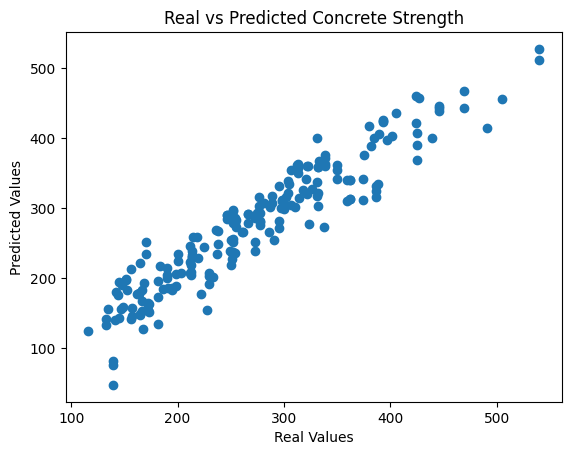

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Concrete Strength')
plt.show()
